In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [103]:
import torch
from p2ch12.dsets import getCandidateInfoList, getCt, LunaDataset
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)


In [109]:
from p2ch12.vis import findPositiveSamples, showCandidate, findNegativeSamples
positiveSample_list = findPositiveSamples(limit = 551065)

2024-08-22 11:32:33,758 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x114480f50>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

In [87]:
numDataPoints = 551065
data_dim = 2
bs = 100

target = np.hstack((np.zeros(int(549714), dtype=np.int32),
                    np.ones(int(1351), dtype=np.int32)))



In [119]:
len(candidateInfo_list)


551065

In [124]:
class_sample_count = torch.tensor([len(ds.pos_list), len(ds.negative_list)])


In [125]:
class_sample_count

tensor([  1351, 549714])

In [89]:
# Create dummy data with class imbalance 9 to 1
data = torch.FloatTensor(numDataPoints, data_dim)

print(f'target train 0/1: {len(np.where(target == 0)[0])}/{len(np.where(target == 1)[0])}')

class_sample_count = torch.tensor([len(ds.pos_list), len(ds.neg_list)])

weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in target])

target train 0/1: 549714/1351


Traceback (most recent call last):
  File "/Users/timurburhanov/miniconda3/envs/first_env/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/Users/timurburhanov/miniconda3/envs/first_env/lib/python3.11/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/Users/timurburhanov/miniconda3/envs/first_env/lib/python3.11/multiprocessing/connection.py", line 360, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [90]:
samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()

In [129]:
len(samples_weight)

551065

In [91]:
sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

target = torch.from_numpy(target).long()
train_dataset = torch.utils.data.TensorDataset(data, target)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=bs, num_workers=1, sampler=None)


In [92]:
for i, (data_t, target_t) in enumerate(train_loader):
    print(f"batch index {i}, 0/1: {len(np.where(target_t.numpy() == 0)[0])}/{len(np.where(target_t.numpy() == 1)[0])}")

batch index 0, 0/1: 100/0
batch index 1, 0/1: 100/0
batch index 2, 0/1: 100/0
batch index 3, 0/1: 100/0
batch index 4, 0/1: 100/0
batch index 5, 0/1: 100/0
batch index 6, 0/1: 100/0
batch index 7, 0/1: 100/0
batch index 8, 0/1: 100/0
batch index 9, 0/1: 100/0
batch index 10, 0/1: 100/0
batch index 11, 0/1: 100/0
batch index 12, 0/1: 100/0
batch index 13, 0/1: 100/0
batch index 14, 0/1: 100/0
batch index 15, 0/1: 100/0
batch index 16, 0/1: 100/0
batch index 17, 0/1: 100/0
batch index 18, 0/1: 100/0
batch index 19, 0/1: 100/0
batch index 20, 0/1: 100/0
batch index 21, 0/1: 100/0
batch index 22, 0/1: 100/0
batch index 23, 0/1: 100/0
batch index 24, 0/1: 100/0
batch index 25, 0/1: 100/0
batch index 26, 0/1: 100/0
batch index 27, 0/1: 100/0
batch index 28, 0/1: 100/0
batch index 29, 0/1: 100/0
batch index 30, 0/1: 100/0
batch index 31, 0/1: 100/0
batch index 32, 0/1: 100/0
batch index 33, 0/1: 100/0
batch index 34, 0/1: 100/0
batch index 35, 0/1: 100/0
batch index 36, 0/1: 100/0
batch index

batch index 559, 0/1: 100/0
batch index 560, 0/1: 100/0
batch index 561, 0/1: 100/0
batch index 562, 0/1: 100/0
batch index 563, 0/1: 100/0
batch index 564, 0/1: 100/0
batch index 565, 0/1: 100/0
batch index 566, 0/1: 100/0
batch index 567, 0/1: 100/0
batch index 568, 0/1: 100/0
batch index 569, 0/1: 100/0
batch index 570, 0/1: 100/0
batch index 571, 0/1: 100/0
batch index 572, 0/1: 100/0
batch index 573, 0/1: 100/0
batch index 574, 0/1: 100/0
batch index 575, 0/1: 100/0
batch index 576, 0/1: 100/0
batch index 577, 0/1: 100/0
batch index 578, 0/1: 100/0
batch index 579, 0/1: 100/0
batch index 580, 0/1: 100/0
batch index 581, 0/1: 100/0
batch index 582, 0/1: 100/0
batch index 583, 0/1: 100/0
batch index 584, 0/1: 100/0
batch index 585, 0/1: 100/0
batch index 586, 0/1: 100/0
batch index 587, 0/1: 100/0
batch index 588, 0/1: 100/0
batch index 589, 0/1: 100/0
batch index 590, 0/1: 100/0
batch index 591, 0/1: 100/0
batch index 592, 0/1: 100/0
batch index 593, 0/1: 100/0
batch index 594, 0/1

batch index 1127, 0/1: 100/0
batch index 1128, 0/1: 100/0
batch index 1129, 0/1: 100/0
batch index 1130, 0/1: 100/0
batch index 1131, 0/1: 100/0
batch index 1132, 0/1: 100/0
batch index 1133, 0/1: 100/0
batch index 1134, 0/1: 100/0
batch index 1135, 0/1: 100/0
batch index 1136, 0/1: 100/0
batch index 1137, 0/1: 100/0
batch index 1138, 0/1: 100/0
batch index 1139, 0/1: 100/0
batch index 1140, 0/1: 100/0
batch index 1141, 0/1: 100/0
batch index 1142, 0/1: 100/0
batch index 1143, 0/1: 100/0
batch index 1144, 0/1: 100/0
batch index 1145, 0/1: 100/0
batch index 1146, 0/1: 100/0
batch index 1147, 0/1: 100/0
batch index 1148, 0/1: 100/0
batch index 1149, 0/1: 100/0
batch index 1150, 0/1: 100/0
batch index 1151, 0/1: 100/0
batch index 1152, 0/1: 100/0
batch index 1153, 0/1: 100/0
batch index 1154, 0/1: 100/0
batch index 1155, 0/1: 100/0
batch index 1156, 0/1: 100/0
batch index 1157, 0/1: 100/0
batch index 1158, 0/1: 100/0
batch index 1159, 0/1: 100/0
batch index 1160, 0/1: 100/0
batch index 11

batch index 1699, 0/1: 100/0
batch index 1700, 0/1: 100/0
batch index 1701, 0/1: 100/0
batch index 1702, 0/1: 100/0
batch index 1703, 0/1: 100/0
batch index 1704, 0/1: 100/0
batch index 1705, 0/1: 100/0
batch index 1706, 0/1: 100/0
batch index 1707, 0/1: 100/0
batch index 1708, 0/1: 100/0
batch index 1709, 0/1: 100/0
batch index 1710, 0/1: 100/0
batch index 1711, 0/1: 100/0
batch index 1712, 0/1: 100/0
batch index 1713, 0/1: 100/0
batch index 1714, 0/1: 100/0
batch index 1715, 0/1: 100/0
batch index 1716, 0/1: 100/0
batch index 1717, 0/1: 100/0
batch index 1718, 0/1: 100/0
batch index 1719, 0/1: 100/0
batch index 1720, 0/1: 100/0
batch index 1721, 0/1: 100/0
batch index 1722, 0/1: 100/0
batch index 1723, 0/1: 100/0
batch index 1724, 0/1: 100/0
batch index 1725, 0/1: 100/0
batch index 1726, 0/1: 100/0
batch index 1727, 0/1: 100/0
batch index 1728, 0/1: 100/0
batch index 1729, 0/1: 100/0
batch index 1730, 0/1: 100/0
batch index 1731, 0/1: 100/0
batch index 1732, 0/1: 100/0
batch index 17

batch index 2269, 0/1: 100/0
batch index 2270, 0/1: 100/0
batch index 2271, 0/1: 100/0
batch index 2272, 0/1: 100/0
batch index 2273, 0/1: 100/0
batch index 2274, 0/1: 100/0
batch index 2275, 0/1: 100/0
batch index 2276, 0/1: 100/0
batch index 2277, 0/1: 100/0
batch index 2278, 0/1: 100/0
batch index 2279, 0/1: 100/0
batch index 2280, 0/1: 100/0
batch index 2281, 0/1: 100/0
batch index 2282, 0/1: 100/0
batch index 2283, 0/1: 100/0
batch index 2284, 0/1: 100/0
batch index 2285, 0/1: 100/0
batch index 2286, 0/1: 100/0
batch index 2287, 0/1: 100/0
batch index 2288, 0/1: 100/0
batch index 2289, 0/1: 100/0
batch index 2290, 0/1: 100/0
batch index 2291, 0/1: 100/0
batch index 2292, 0/1: 100/0
batch index 2293, 0/1: 100/0
batch index 2294, 0/1: 100/0
batch index 2295, 0/1: 100/0
batch index 2296, 0/1: 100/0
batch index 2297, 0/1: 100/0
batch index 2298, 0/1: 100/0
batch index 2299, 0/1: 100/0
batch index 2300, 0/1: 100/0
batch index 2301, 0/1: 100/0
batch index 2302, 0/1: 100/0
batch index 23

batch index 2846, 0/1: 100/0
batch index 2847, 0/1: 100/0
batch index 2848, 0/1: 100/0
batch index 2849, 0/1: 100/0
batch index 2850, 0/1: 100/0
batch index 2851, 0/1: 100/0
batch index 2852, 0/1: 100/0
batch index 2853, 0/1: 100/0
batch index 2854, 0/1: 100/0
batch index 2855, 0/1: 100/0
batch index 2856, 0/1: 100/0
batch index 2857, 0/1: 100/0
batch index 2858, 0/1: 100/0
batch index 2859, 0/1: 100/0
batch index 2860, 0/1: 100/0
batch index 2861, 0/1: 100/0
batch index 2862, 0/1: 100/0
batch index 2863, 0/1: 100/0
batch index 2864, 0/1: 100/0
batch index 2865, 0/1: 100/0
batch index 2866, 0/1: 100/0
batch index 2867, 0/1: 100/0
batch index 2868, 0/1: 100/0
batch index 2869, 0/1: 100/0
batch index 2870, 0/1: 100/0
batch index 2871, 0/1: 100/0
batch index 2872, 0/1: 100/0
batch index 2873, 0/1: 100/0
batch index 2874, 0/1: 100/0
batch index 2875, 0/1: 100/0
batch index 2876, 0/1: 100/0
batch index 2877, 0/1: 100/0
batch index 2878, 0/1: 100/0
batch index 2879, 0/1: 100/0
batch index 28

batch index 3414, 0/1: 100/0
batch index 3415, 0/1: 100/0
batch index 3416, 0/1: 100/0
batch index 3417, 0/1: 100/0
batch index 3418, 0/1: 100/0
batch index 3419, 0/1: 100/0
batch index 3420, 0/1: 100/0
batch index 3421, 0/1: 100/0
batch index 3422, 0/1: 100/0
batch index 3423, 0/1: 100/0
batch index 3424, 0/1: 100/0
batch index 3425, 0/1: 100/0
batch index 3426, 0/1: 100/0
batch index 3427, 0/1: 100/0
batch index 3428, 0/1: 100/0
batch index 3429, 0/1: 100/0
batch index 3430, 0/1: 100/0
batch index 3431, 0/1: 100/0
batch index 3432, 0/1: 100/0
batch index 3433, 0/1: 100/0
batch index 3434, 0/1: 100/0
batch index 3435, 0/1: 100/0
batch index 3436, 0/1: 100/0
batch index 3437, 0/1: 100/0
batch index 3438, 0/1: 100/0
batch index 3439, 0/1: 100/0
batch index 3440, 0/1: 100/0
batch index 3441, 0/1: 100/0
batch index 3442, 0/1: 100/0
batch index 3443, 0/1: 100/0
batch index 3444, 0/1: 100/0
batch index 3445, 0/1: 100/0
batch index 3446, 0/1: 100/0
batch index 3447, 0/1: 100/0
batch index 34

batch index 3982, 0/1: 100/0
batch index 3983, 0/1: 100/0
batch index 3984, 0/1: 100/0
batch index 3985, 0/1: 100/0
batch index 3986, 0/1: 100/0
batch index 3987, 0/1: 100/0
batch index 3988, 0/1: 100/0
batch index 3989, 0/1: 100/0
batch index 3990, 0/1: 100/0
batch index 3991, 0/1: 100/0
batch index 3992, 0/1: 100/0
batch index 3993, 0/1: 100/0
batch index 3994, 0/1: 100/0
batch index 3995, 0/1: 100/0
batch index 3996, 0/1: 100/0
batch index 3997, 0/1: 100/0
batch index 3998, 0/1: 100/0
batch index 3999, 0/1: 100/0
batch index 4000, 0/1: 100/0
batch index 4001, 0/1: 100/0
batch index 4002, 0/1: 100/0
batch index 4003, 0/1: 100/0
batch index 4004, 0/1: 100/0
batch index 4005, 0/1: 100/0
batch index 4006, 0/1: 100/0
batch index 4007, 0/1: 100/0
batch index 4008, 0/1: 100/0
batch index 4009, 0/1: 100/0
batch index 4010, 0/1: 100/0
batch index 4011, 0/1: 100/0
batch index 4012, 0/1: 100/0
batch index 4013, 0/1: 100/0
batch index 4014, 0/1: 100/0
batch index 4015, 0/1: 100/0
batch index 40

batch index 4551, 0/1: 100/0
batch index 4552, 0/1: 100/0
batch index 4553, 0/1: 100/0
batch index 4554, 0/1: 100/0
batch index 4555, 0/1: 100/0
batch index 4556, 0/1: 100/0
batch index 4557, 0/1: 100/0
batch index 4558, 0/1: 100/0
batch index 4559, 0/1: 100/0
batch index 4560, 0/1: 100/0
batch index 4561, 0/1: 100/0
batch index 4562, 0/1: 100/0
batch index 4563, 0/1: 100/0
batch index 4564, 0/1: 100/0
batch index 4565, 0/1: 100/0
batch index 4566, 0/1: 100/0
batch index 4567, 0/1: 100/0
batch index 4568, 0/1: 100/0
batch index 4569, 0/1: 100/0
batch index 4570, 0/1: 100/0
batch index 4571, 0/1: 100/0
batch index 4572, 0/1: 100/0
batch index 4573, 0/1: 100/0
batch index 4574, 0/1: 100/0
batch index 4575, 0/1: 100/0
batch index 4576, 0/1: 100/0
batch index 4577, 0/1: 100/0
batch index 4578, 0/1: 100/0
batch index 4579, 0/1: 100/0
batch index 4580, 0/1: 100/0
batch index 4581, 0/1: 100/0
batch index 4582, 0/1: 100/0
batch index 4583, 0/1: 100/0
batch index 4584, 0/1: 100/0
batch index 45

batch index 5104, 0/1: 100/0
batch index 5105, 0/1: 100/0
batch index 5106, 0/1: 100/0
batch index 5107, 0/1: 100/0
batch index 5108, 0/1: 100/0
batch index 5109, 0/1: 100/0
batch index 5110, 0/1: 100/0
batch index 5111, 0/1: 100/0
batch index 5112, 0/1: 100/0
batch index 5113, 0/1: 100/0
batch index 5114, 0/1: 100/0
batch index 5115, 0/1: 100/0
batch index 5116, 0/1: 100/0
batch index 5117, 0/1: 100/0
batch index 5118, 0/1: 100/0
batch index 5119, 0/1: 100/0
batch index 5120, 0/1: 100/0
batch index 5121, 0/1: 100/0
batch index 5122, 0/1: 100/0
batch index 5123, 0/1: 100/0
batch index 5124, 0/1: 100/0
batch index 5125, 0/1: 100/0
batch index 5126, 0/1: 100/0
batch index 5127, 0/1: 100/0
batch index 5128, 0/1: 100/0
batch index 5129, 0/1: 100/0
batch index 5130, 0/1: 100/0
batch index 5131, 0/1: 100/0
batch index 5132, 0/1: 100/0
batch index 5133, 0/1: 100/0
batch index 5134, 0/1: 100/0
batch index 5135, 0/1: 100/0
batch index 5136, 0/1: 100/0
batch index 5137, 0/1: 100/0
batch index 51

In [135]:
#print(list(torch.utils.data.WeightedRandomSampler([0.1, 0.9, 0.4, 0.7, 3.0, 0.6], 5, replacement=True)))
for i in range(10):
    print(list(torch.utils.data.WeightedRandomSampler([0.9, 0.4, 0.05, 0.2, 0.3, 0.1], 5, replacement=False)))

[4, 3, 2, 0, 1]
[3, 1, 0, 4, 2]
[3, 0, 1, 2, 4]
[0, 3, 1, 4, 2]
[3, 2, 0, 4, 1]
[0, 1, 2, 4, 5]
[1, 4, 5, 0, 2]
[1, 0, 3, 4, 2]
[0, 5, 4, 3, 1]
[0, 3, 1, 4, 5]


In [99]:
candidateInfo_list = [True, True, True, True, False, False, False, False,]


pos_list = [pt for pt in candidateInfo_list if candidateInfo_list]

In [101]:
pos_list

[True, True, True, True, False, False, False, False]

In [105]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)



2024-08-22 11:07:33,211 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x134b62850>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-08-22 11:07:33,240 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x17fd38cd0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-08-22 11:07:33,277 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x17fd3b610>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-08-22 11:07:33,312 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x164298390>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-08-22 11:07:33,347 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x17fd3b290>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-08-22 11:07:33,381 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaData

In [121]:
ds = LunaDataset()
len(ds.pos_list)

2024-08-23 20:17:10,916 INFO     pid:6704 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x1672f5250>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


1351

In [116]:
ds_list

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))


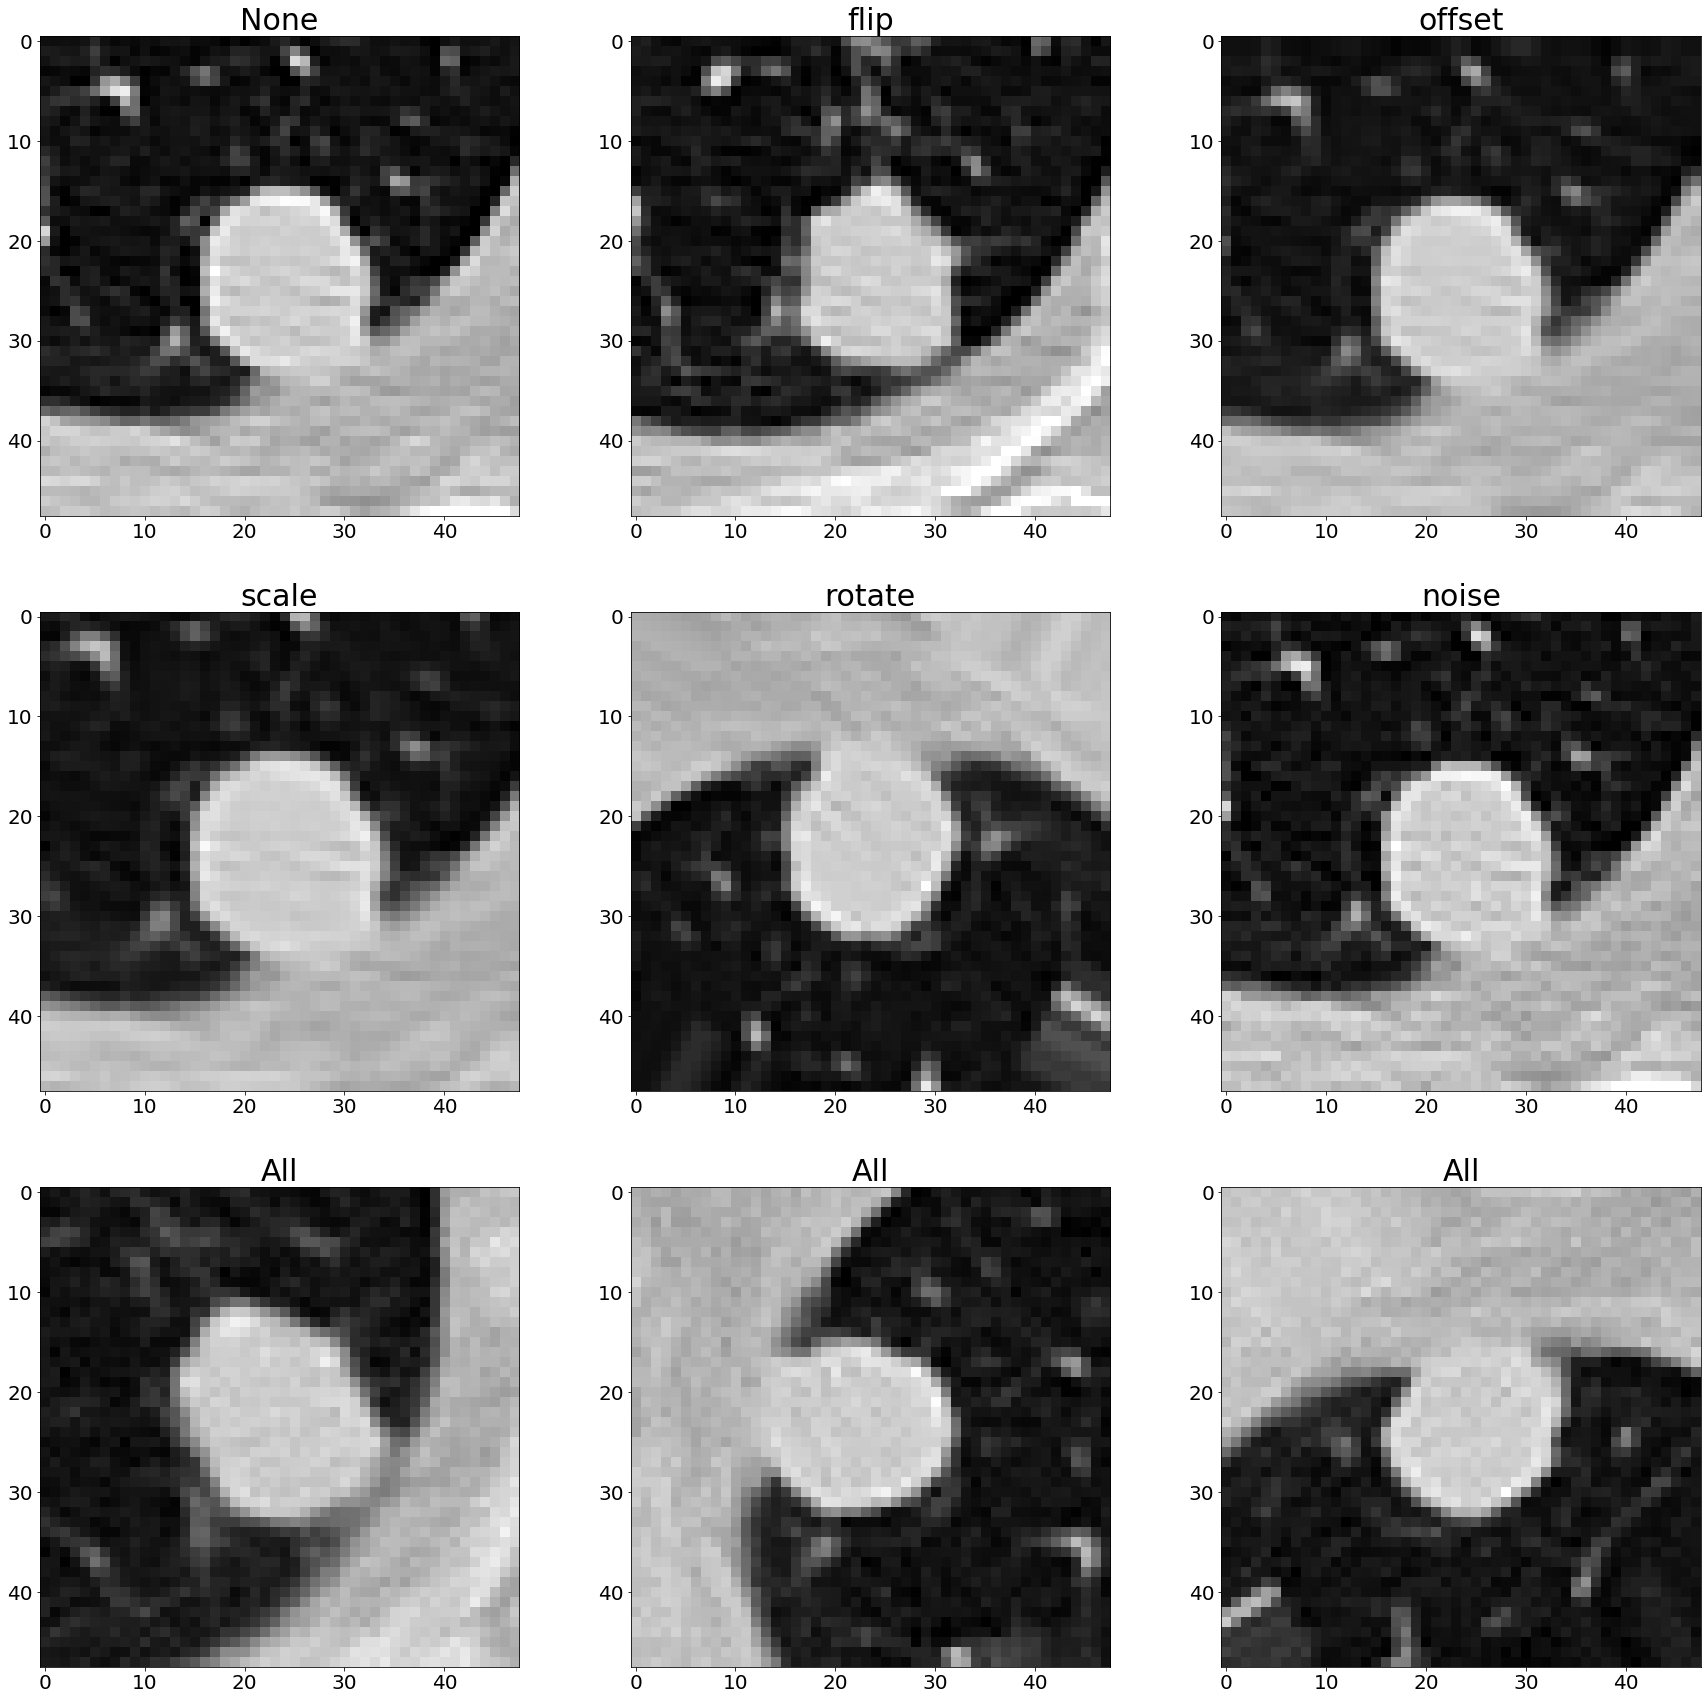

In [5]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155


sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')



2020-01-11 19:50:12,409 INFO     pid:9592 p2ch12.dsets:289:__init__ <p2ch12.dsets.LunaDataset object at 0x0000020CD90EDAC8>: 911 training samples, 904 neg, 7 pos, unbalanced ratio


AttributeError: 'Tensor' object has no attribute 'index'

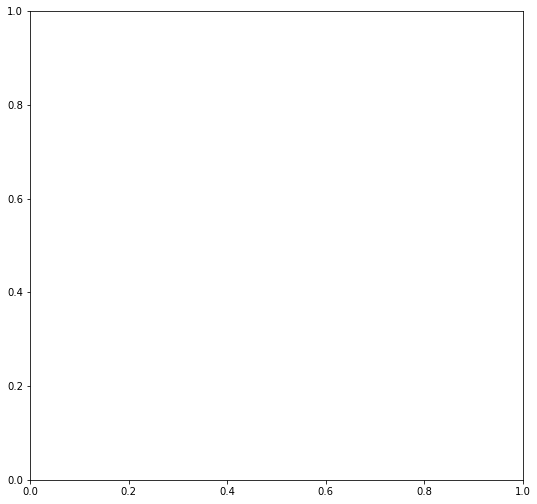

In [6]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid)